In [1]:
%run 'functions_dump.py'

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [11]:
%run 'ks21_Read_impacts_of_mutations.ipynb'

11510
259

Variables: 

- fit_dict: a dictionary, keys are mutations and values are pandas.Series of fitness impacts in all backgrounds. 



In [67]:
%run 'ks20_Read_ddG.ipynb'


Variables: 
- predicted_ddG:		Pandas DataFrame with all calculated ddG (single, double and triple mutants (?)),
- predicted_doubles:		doubles only (Pandas DataFrame),
- predicted_singles:		singles only (Pandas DataFrame),
- get_ddG:			function that returns predicted ddG for a genotype
- by_position_mean_ddG:		mean ddG value at each position,
- by_position_var_ddG:		variance of predicted ddG at each position.



In [68]:
def get_neutrality(series_of_impacts, neutrality_threshold=0.4, noise_cutoff=0.01):
    negative = series_of_impacts[series_of_impacts < -1 * neutrality_threshold]
    positive = series_of_impacts[series_of_impacts > neutrality_threshold]
    neutral = series_of_impacts[(series_of_impacts < neutrality_threshold) & (series_of_impacts > -1 * neutrality_threshold)]
    fraction_negative = 1. * len(negative) / len(series_of_impacts)
    fraction_positive = 1. * len(positive) / len(series_of_impacts)
    if fraction_negative < noise_cutoff and fraction_positive < noise_cutoff:
        return 'neutral'
    if fraction_negative > noise_cutoff and fraction_positive < noise_cutoff:
        return 'negative'
    if fraction_negative < noise_cutoff and fraction_positive > noise_cutoff:
        return 'positive'
    if fraction_negative > noise_cutoff and fraction_positive > noise_cutoff:
        return 'mixed_effects'
    
def get_neutrality_percents(series_of_impacts, neutrality_threshold=0.4, noise_cutoff=0.01):
    negative = series_of_impacts[series_of_impacts < -1 * neutrality_threshold]
    positive = series_of_impacts[series_of_impacts > neutrality_threshold]
    neutral = series_of_impacts[(series_of_impacts <= neutrality_threshold) & (series_of_impacts >= -1 * neutrality_threshold)]
    fraction_negative = 1. * len(negative) / len(series_of_impacts)
    fraction_positive = 1. * len(positive) / len(series_of_impacts)
    fraction_neutral = 1. * len(neutral) / len(series_of_impacts)
    return fraction_negative, fraction_neutral, fraction_positive

In [90]:
neutrality_dict = get_fitness_summary(fit_dict, lambda series: get_neutrality_percents(series, neutrality_threshold=0.6))
neutrality = pd.Series(neutrality_dict)

predicted_singles['%_negative'] = predicted_singles['mut_list_Scer'].apply(lambda s: neutrality.loc[s][0])
predicted_singles['%_neutral'] = predicted_singles['mut_list_Scer'].apply(lambda s: neutrality.loc[s][1])
predicted_singles['%_positive'] = predicted_singles['mut_list_Scer'].apply(lambda s: neutrality.loc[s][2])

,%_negative,%_neutral,%_positive,ddG
%_negative,1.000000,-1.000000,-0.134029,0.589722
%_neutral,-1.000000,1.000000,0.133732,-0.589702
%_positive,-0.134029,0.133732,1.000000,-0.146390
ddG,0.589722,-0.589702,-0.146390,1.000000


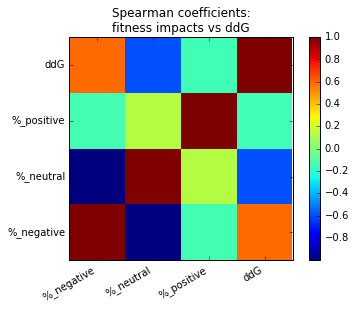

In [91]:
cols = ['%_negative', '%_neutral', '%_positive', 'ddG']
display(predicted_singles[cols].corr())
plt.imshow(predicted_singles[cols].corr(), origin='lower', interpolation='none')
plt.colorbar()
plt.xticks(range(len(cols)), cols, rotation=30, ha='right')
plt.yticks(range(len(cols)), cols)
plt.title('Spearman coefficients:\nfitness impacts vs ddG')

0


<Container object of 4 artists>

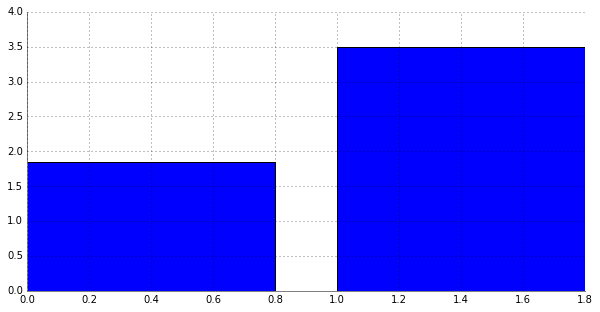

In [37]:
plot_better()
neutral = predicted_singles[predicted_singles['neutrality'] == 'neutral']
negative = predicted_singles[predicted_singles['neutrality'] == 'negative']
positive = predicted_singles[predicted_singles['neutrality'] == 'positive']
mixed = predicted_singles[predicted_singles['neutrality'] == 'mixed_effects']

print len(positive)

plt.bar(range(4), [neutral['ddG'].mean(), negative['ddG'].mean(), positive['ddG'].mean(), mixed['ddG'].mean()])